# Test de código para obtener los valores cuota de una estrategia

### Paso 0. Para obtener los valores de una estrategia, primero tenemos que crear las estrategias

In [1]:
%matplotlib inline

import datetime
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import sys
sys.path.append("../")

from src import Estrategia, generate_df_valores_cuota


#Cargar base de días hábiles
dbpath = r'../processed_data/db_habiles.db'
conn_habiles = sqlite3.connect(dbpath)
df_dias_habiles = pd.read_sql('SELECT * FROM HABILES',
                         conn_habiles, parse_dates=['Fecha'])

# PARAMETROS PARA DEFINIR LA ESTRATEGIA
fecha_ini = datetime.datetime.strptime('2015-01-01', '%Y-%m-%d').date()
fecha_end = datetime.datetime.strptime('2020-12-13', '%Y-%m-%d').date()


estrategia_ff = Estrategia(fecha_ini, fecha_end, 'FF', 'raw_data/anuncios_ff.xlsx')
estrategia_a = Estrategia(fecha_ini, fecha_end, 'A')

print(estrategia_ff)
print(estrategia_a)



Estrategia: FF
Fecha Inicio: 2015-01-01
Fecha Término: 2020-12-13

2015-01-01 - 2015-02-12 : [0, 0, 0, 0, 1.0]
2015-02-12 - 2015-03-18 : [0.5, 0, 0, 0, 0.5]
2015-03-18 - 2015-05-13 : [1.0, 0, 0, 0, 0]
...
2020-12-01 - 2020-12-13 : [0.6, 0, 0, 0, 0.4]

Estrategia: A
Fecha Inicio: 2015-01-01
Fecha Término: 2020-12-13

2015-01-01 - 2020-12-13 : [1, 0, 0, 0, 0]
2015-01-01 - 2020-12-13 : [1, 0, 0, 0, 0]



### Paso 1. Teniendo las estrategias creadas, podemos obtener la valorización de las cuotas correspondientes

In [2]:
# PARAMETROS BASE PARA BUSCAR LOS VALORES CUOTA

afp = 'HABITAT'
monto_inicial = 100

# ESTE PARÁMETRO PERMITE CONTROLAR 
# EL NÚMERO DE DÍAS DE REZAGO CON LOS QUE UNA PERSONA 
# INGRESA LA SOLICITUD DE CAMBIO DE FONDO 
# (ES RELEVANTE SOLO EN ESTRATEGIAS ACTIVAS...)

lag_solicitud = 1   


df_out = generate_df_valores_cuota(estrategia_ff, afp, monto_inicial, lag_solicitud, df_dias_habiles)

df_out

,Fecha,V_HABITAT_FF_lag_1,CP_A,CP_B,CP_C,CP_D,CP_E
0,2015-01-01,100.000000,0.000000,0.0,0.0,0.0,0.003214
1,2015-01-02,99.949919,0.000000,0.0,0.0,0.0,0.003214
2,2015-01-03,99.949919,0.000000,0.0,0.0,0.0,0.003214
3,2015-01-04,99.949919,0.000000,0.0,0.0,0.0,0.003214
4,2015-01-05,99.971199,0.000000,0.0,0.0,0.0,0.003214
...,...,...,...,...,...,...,...
1826,2020-12-09,145.875021,0.001589,0.0,0.0,0.0,0.001279
1827,2020-12-10,145.180045,0.001589,0.0,0.0,0.0,0.001279
1828,2020-12-11,145.156734,0.001589,0.0,0.0,0.0,0.001279
1829,2020-12-12,145.156734,0.001589,0.0,0.0,0.0,0.001279


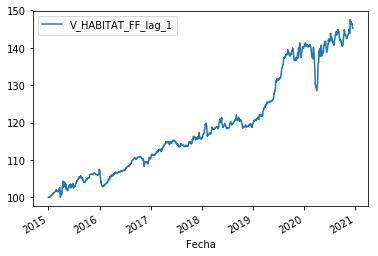

In [3]:
df_out = df_out.set_index('Fecha')
df_out[['V_HABITAT_FF_lag_1']].plot()
plt.show()

In [4]:
df_out2 = generate_df_valores_cuota(estrategia_a, afp, monto_inicial, lag_solicitud, df_dias_habiles)

df_out2

,Fecha,V_HABITAT_A_lag_1,CP_A,CP_B,CP_C,CP_D,CP_E
0,2015-01-01,100.000000,0.002919,0.0,0.0,0.0,0.0
1,2015-01-02,99.854072,0.002919,0.0,0.0,0.0,0.0
2,2015-01-03,99.854072,0.002919,0.0,0.0,0.0,0.0
3,2015-01-04,99.854072,0.002919,0.0,0.0,0.0,0.0
4,2015-01-05,100.450073,0.002919,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2169,2020-12-09,160.990247,0.002919,0.0,0.0,0.0,0.0
2170,2020-12-10,159.913027,0.002919,0.0,0.0,0.0,0.0
2171,2020-12-11,159.878698,0.002919,0.0,0.0,0.0,0.0
2172,2020-12-12,159.878698,0.002919,0.0,0.0,0.0,0.0


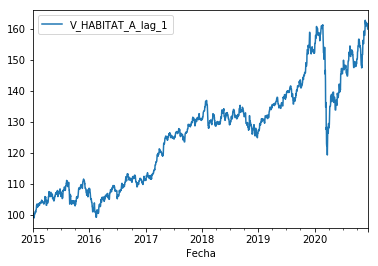

In [5]:
df_out2 = df_out2.set_index('Fecha')
df_out2[['V_HABITAT_A_lag_1']].plot()
plt.show()